In [2]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 89.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 84.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 53.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 124.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 52.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Prepar

In [3]:
import pandas as pd
import numpy as np
import os
import ktrain
from ktrain import text
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [4]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir("drive/MyDrive/Colab Notebooks")

Mounted at /content/drive


In [5]:
data = pd.read_csv('complaints_small.csv', sep = ';')
print(data.shape)

(113544, 21)


<ipython-input-5-b59ef2f59ecc>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('complaints_small.csv', sep = ';')


In [7]:
data.head()

,Unnamed: 0,level_0,index,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,...,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,0,717668,1873493,2020-10-31,Vehicle loan or lease,Loan,Incorrect information on your report,Account status incorrect,JPMCB Auto it is showing on my credit report a...,NaN,...,TX,77598,NaN,Consent provided,Web,2020-11-05,Closed with explanation,Yes,NaN,3930044
1,1,491519,1241229,2021-09-10,Vehicle loan or lease,Loan,Improper use of your report,Reporting company used your report improperly,I have requested that pnc bank send me all doc...,NaN,...,TX,75039,NaN,Consent provided,Web,2021-09-10,Closed with explanation,Yes,NaN,4709181
2,2,135499,433774,2020-06-22,Vehicle loan or lease,Loan,Incorrect information on your report,Account status incorrect,I have contacted GM Financial for the 3 month ...,NaN,...,SC,29681,NaN,Consent provided,Web,2020-06-22,Closed with explanation,Yes,NaN,3709256
3,3,1299045,3605075,2019-09-05,Vehicle loan or lease,Lease,Problems at the end of the loan or lease,"Excess mileage, damage, or wear fees, or other...",I returned my XXXX XXXX XXXX ( which was lease...,Company has responded to the consumer and the ...,...,FL,33446,NaN,Consent provided,Web,2019-09-05,Closed with non-monetary relief,Yes,NaN,3363577
4,4,14323,76953,2023-03-23,Vehicle loan or lease,Loan,Incorrect information on your report,Account status incorrect,I financed a vehicle through Ally Financial. T...,Company has responded to the consumer and the ...,...,LA,701XX,NaN,Consent provided,Web,2023-03-23,Closed with explanation,Yes,NaN,6736131


In [8]:
print(list(data.columns))

['Unnamed: 0', 'level_0', 'index', 'Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID']


In [6]:
text_data = data[['Consumer complaint narrative', 'Product']]

In [7]:
print(list(set(text_data.Product)))
prod_names = list(set(text_data.Product))

['Debt collection', 'Credit card', 'Credit card or prepaid card', 'Vehicle loan or lease', 'Bank account or service', 'Credit reporting, credit repair services, or other personal consumer reports', 'Payday loan, title loan, or personal loan', 'Mortgage', 'Credit reporting', 'Money transfer, virtual currency, or money service', 'Checking or savings account', 'Student loan']


In [20]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_df(text_data, 
                                                                   'Consumer complaint narrative', # name of column containing review text
                                                                   label_columns=['Product'],
                                                                   maxlen=75, 
                                                                   max_features=100000,
                                                                   preprocess_mode='standard',
                                                                   val_pct=0.1,
                                                                   ngram_range=1)

['Bank account or service', 'Checking or savings account', 'Credit card', 'Credit card or prepaid card', 'Credit reporting', 'Credit reporting, credit repair services, or other personal consumer reports', 'Debt collection', 'Money transfer, virtual currency, or money service', 'Mortgage', 'Payday loan, title loan, or personal loan', 'Student loan', 'Vehicle loan or lease']
        Bank account or service  Checking or savings account  Credit card  \
17160                       0.0                          1.0          0.0   
104858                      0.0                          0.0          0.0   
86558                       0.0                          0.0          0.0   
40718                       0.0                          0.0          1.0   
86715                       0.0                          0.0          0.0   

        Credit card or prepaid card  Credit reporting  \
17160                           0.0               0.0   
104858                          0.0            

## NBSVM model

In [16]:
model = text.text_classifier('nbsvm', (x_train, y_train) , preproc=preproc)
learner = ktrain.get_learner(model, 
                             train_data=(x_train, y_train), 
                             val_data=(x_test, y_test), 
                             batch_size=32)

Is Multi-Label? False
compiling word ID features...
maxlen is 75
building document-term matrix... this may take a few moments...
rows: 1-10000
rows: 10001-20000
rows: 20001-30000
rows: 30001-40000
rows: 40001-50000
rows: 50001-60000
rows: 60001-70000
rows: 70001-80000
rows: 80001-90000
rows: 90001-100000
rows: 100001-102189
computing log-count ratios...
done.


simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
3194/3194 [==============================] - 169s 52ms/step - loss: 8.2762 - accuracy: 0.5836


done.
Visually inspect loss plot and select learning rate associated with falling loss


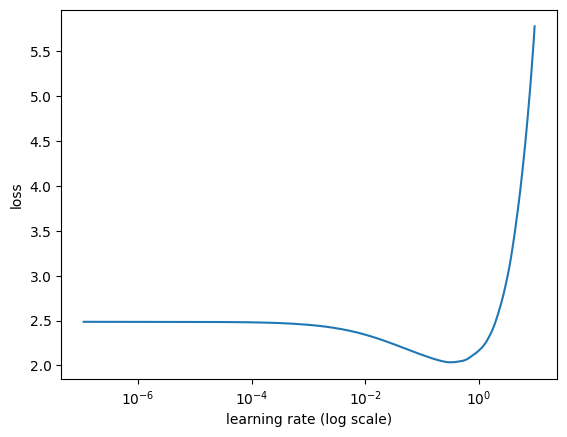

In [17]:
learner.lr_find(show_plot=True)

In [18]:
learner.autofit(1e-2, 1)



begin training using triangular learning rate policy with max lr of 0.01...
3194/3194 [==============================] - 314s 98ms/step - loss: 0.6182 - accuracy: 0.8849 - val_loss: 1.4592 - val_accuracy: 0.5632


### Inspecting Misclassifications

In [19]:
learner.view_top_losses(n=1, preproc=preproc)

355/355 [==============================] - 1s 3ms/step
----------
id:137 | loss:16.12 | true:Debt collection | pred:Credit reporting)




### Prediction

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [22]:
y_pred = learner.model.predict(x_test, verbose=0)
score = roc_auc_score(y_test, y_pred)
print("\n ROC-AUC score: %.6f \n" % (score))


 ROC-AUC score: 0.909354 



In [29]:

y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
print(classification_report(y_test, y_pred, target_names = prod_names))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.50      0.50      0.50       950
Credit reporting, credit repair services, or other personal consumer reports       0.39      0.45      0.42       904
                                                 Credit card or prepaid card       0.49      0.51      0.50       889
                                                 Checking or savings account       0.43      0.37      0.40       923
                                                             Debt collection       0.62      0.70      0.66       944
                                                       Vehicle loan or lease       0.74      0.59      0.65       968
                                                                    Mortgage       0.59      0.60      0.59       967
                          Money transfer, virtual curre

In [32]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[471 187  90  38  20   3  13  45  44  21   9   9]
 [178 407  27  50   5   4  12 151  24  20   7  19]
 [ 79  34 453 131  53   7  38  12  20  23  20  19]
 [ 41 110 161 346  21  15  20  77  29  54  18  31]
 [ 19   9  34  16 662  59  64  11  19  16  15  20]
 [  5  10  19  24 166 567  75   9  13  24  22  34]
 [  9  14  23  32  81  49 577   7  35  67  29  44]
 [ 54 163  11  38   4   5  13 625  20  21   7  10]
 [ 34  20  23  19   9   3  13  19 665  55  62  51]
 [ 33  41  36  50  20  18  68  46  63 407  72 110]
 [  8  11  23  23  15   8  34   7  43  58 687  29]
 [ 18  26  23  35  20  26  53  20  57  99  51 528]]


## bert model

In [15]:
(x_train_b, y_train_b), (x_test_b, y_test_b), preproc = text.texts_from_df(text_data, 
                                                                   'Consumer complaint narrative', # name of column containing review text
                                                                   label_columns=['Product'],
                                                                   maxlen=75, 
                                                                   max_features=10000,
                                                                   preprocess_mode='bert',
                                                                   val_pct=0.1,
                                                                   ngram_range=1)

['Bank account or service', 'Checking or savings account', 'Credit card', 'Credit card or prepaid card', 'Credit reporting', 'Credit reporting, credit repair services, or other personal consumer reports', 'Debt collection', 'Money transfer, virtual currency, or money service', 'Mortgage', 'Payday loan, title loan, or personal loan', 'Student loan', 'Vehicle loan or lease']
       Bank account or service  Checking or savings account  Credit card  \
2124                       0.0                          0.0          0.0   
65661                      0.0                          0.0          0.0   
87343                      0.0                          0.0          0.0   
95393                      0.0                          0.0          0.0   
95075                      0.0                          0.0          0.0   

       Credit card or prepaid card  Credit reporting  \
2124                           0.0               0.0   
65661                          0.0               1.0   

Is Multi-Label? False
preprocessing test...
language: en


In [16]:
model_b = text.text_classifier('bert', (x_train_b, y_train_b) , preproc=preproc)
learner_b = ktrain.get_learner(model_b, 
                               train_data=(x_train_b, y_train_b), 
                               val_data=(x_test_b, y_test_b), 
                               batch_size=32)

Is Multi-Label? False
maxlen is 75


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


done.


In [17]:
learner_b.lr_find(show_plot=True)

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
   3/3194 [..............................] - ETA: 17:07:27 - loss: 3.1726 - accuracy: 0.0729

Exception ignored in: <function UniquePtr.__del__ at 0x7f2eafc70f70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/c_api_util.py", line 74, in __del__
    self.deleter(obj)
KeyboardInterrupt: 


Call to keras.models.load_model failed. Try manually invoking this function to investigate error and report issue if necessary.


Exception: ignored

In [ ]:
#learner_b.fit_onecycle(3e-5, 4)
learner_b.autofit(5e-3, 1)

In [14]:
y_pred_b = learner_b.model.predict(x_test_b, verbose=0)
score = roc_auc_score(y_test_b, y_pred_b)
print("\n ROC-AUC score: %.6f \n" % (score))

KeyboardInterrupt: ignored

In [ ]:
y_pred_b = np.argmax(y_pred_b, axis=1)
y_test_b = np.argmax(y_test_b, axis=1)
print(classification_report(y_test, y_pred, target_names = prod_names))

In [ ]:
cm = confusion_matrix(y_test_b, y_pred_b)
print(cm)

## Fasttext model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
def get_model():
    model = Sequential()
    model.add(Embedding(20000+1, 50, input_length=400)) # add 1 for padding token
    model.add(GlobalAveragePooling1D())
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
model_ft = get_model()

In [25]:
learner_ft = ktrain.get_learner(model_ft, train_data=(x_train, y_train), val_data=(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/ktrain/__init__.py:138: UserWarning: ktrain currently only supports legacy optimizers in tensorflow>=2.11 - recompiling your model to use legacy Adam
  warnings.warn(


In [ ]:
learner_ft.lr_find(show_plot=True)

simulating training for different learning rates... this may take a few moments...


In [ ]:
learner_ft.lr_plot()

In [ ]:
learner_ft.autofit(0.005, 2)

In [ ]:
y_pred_ft = learner_ft.model.predict(x_test, verbose=0)
score = roc_auc_score(y_test, y_pred_ft)
print("\n ROC-AUC score: %.6f \n" % (score))

In [ ]:
y_test = np.argmax(y_test, axis=1)
y_pred_ft = np.argmax(y_pred_ft, axis=1)
print(classification_report(y_test, y_pred_ft, target_names = prod_names))

In [ ]:
cm = confusion_matrix(y_test_b, y_pred_b)
print(cm)

## distbert model

In [ ]:
MODEL_NAME = 'distilbert-base-uncased'
t = text.Transformer(MODEL_NAME, 
                     maxlen=500, 
                     class_names=train_b.target_names)
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_test, y_test)
model = t.get_classifier()
learner = ktrain.get_learner(model, 
                             train_data=trn, 
                             val_data=val,
                             batch_size=6)

In [ ]:
learner.lr_find(show_plot=True, max_epochs=2)

In [ ]:
learner.fit_onecycle(8e-5, 4)

In [ ]:
learner.validate(class_names=t.get_classes())

In [ ]:
# the one we got most wrong
learner.view_top_losses(n=1, preproc=t)

In [ ]:
print(x_test[521])